# Face Metrics Experiments

In [61]:
import sys
sys.path.append("..")

from newMesh import*
from PolyllaFace import PolyllaFace
import matplotlib.pyplot as plt
import json
import time
import os

polylla_inradoius = []
polylla_circumradoius = []
polylla_area = []
polylla_e1 = []
polylla_e2 = [] 
polylla_tra = []

inradious = 'r'
# circumradious = 'R'
area = 'a'
tri_aspect = 'tra'
e1 ="are1"
e2 ="are2"

result_folder = 'Results/'

In [62]:
# TODO: correr de nuevo
def generateJSON(info,distribution,flag, number, filename):
    metrics = info[0]
    polylla_info = info[1]
    tetra_info = info[2]
    data = {
        'number': number,
        'distribution':distribution,
        'union_method':flag,
        'dt': metrics[0],
        'n_points': tetra_info[0],
        'n_faces': tetra_info[1],
        'n_tetras': tetra_info[2],
        'n_edges': tetra_info[3],
        'n_polyhedrons':polylla_info[0],
        'n_barrier_faces':polylla_info[1],
        'polyhedra_with_barriers': polylla_info[2],
        'n_tetra_left': polylla_info[3],
        'convex_rate': metrics[1],
        'polyhedra_with_kernel': metrics[5][3],
        'avg_edge_ratio': metrics[2][0],
        'min_edge_ratio': metrics[2][1],
        'max_edge_ratio': metrics[2][2],
        'avg_tetra_per_polyhedron': metrics[3][0],
        'min_tetra_per_polyhedron': metrics[3][1],
        'max_tetra_per_polyhedron': metrics[3][2],
        'avg_face_per_polyhedron': metrics[4][0],
        'min_face_per_polyhedron': metrics[4][1],
        'max_face_per_polyhedron': metrics[4][2],
        'avg_polyhedron_volume_ratio': metrics[5][0],
        'min_polyhedron_volume_ratio': metrics[5][1],
        'max_polyhedron_volume_ratio': metrics[5][2],
        'avg_polyhedron_area_ratio': metrics[6][0],
        'min_polyhedron_area_ratio': metrics[6][1],
        'max_polyhedron_area_ratio': metrics[6][2],
        'filename':filename.replace('data',''),
        'clean_name': str(tetra_info[0])+distribution+flag
    }
    filename = result_folder+str(tetra_info[0])+'_'+distribution+'_'+flag+'_result.json'
    with open(filename,'w') as outfile:
        json.dump(data,outfile)


In [63]:
def run_polylla(n, distribution, flag):
    filename = "../data/Experiments/"+ str(n) + distribution +".1"
    node_file = filename + ".node"
    ele_file = filename + ".ele"
    face_file = filename + ".face"

    t0 = time.time()
    mesh= FaceTetrahedronMesh(node_file, face_file, ele_file)
    polyllaFace_mesh = PolyllaFace(mesh,flag)
    tf = time.time()

    dtM = tf - t0 

    print('Tiempo:',dtM,'segs')
    edge_ratio = polyllaFace_mesh.edge_ratio()
    tetra_per_poly = polyllaFace_mesh.tetra_per_poly()
    faces_per_poly = polyllaFace_mesh.faces_per_poly()
    convex_polyhedrons = polyllaFace_mesh.convex_polyhedrons()
    polyhedron_area_ratio = polyllaFace_mesh.polyhedron_area()
    
    # print(polyllaFace_mesh.mesh.face_list[4],polyllaFace_mesh.mesh.face_list[12])
    # print('\n Stats polylla:')
    polylla_info = polyllaFace_mesh.get_info()
    # print('Polyhedrons are convex:', convex_polyhedrons*100,'%')
    filename = 'Files/polylla_'+distribution+str(n)+flag
    polyllaFace_mesh.writePolygonFile(filename)
    # print(polyllaFace_mesh.mesh.face_list[4],polyllaFace_mesh.mesh.face_list[12])
    #polyllaFace_mesh.printOFF_each_poly('../logs/polys'+flag+filename)
    os.system("./kernel "+ filename +".txt")
    polyhedrom_volume_ratio = polyllaFace_mesh.volume_ratio(filename+'_kernel_volumes')
    
    # print('Mean Edge Ratio:', edge_ratio[0])
    # print('Minimum Edge Ratio:', edge_ratio[1])
    # print('Maximum Edge Ratio:', edge_ratio[2])
    # print('Mean Tetrahedron per Polyhedron:', tetra_per_poly[0])
    # print('Minimum Tetrahedron per Polyhedron:', tetra_per_poly[1])
    # print('Maximum Tetrahedron per Polyhedron:', tetra_per_poly[2])
    # print('Mean Faces per Polyhedron:', faces_per_poly[0])
    # print('Minimum Faces per Polyhedron:', faces_per_poly[1])
    # print('Maximum Faces per Polyhedron:', faces_per_poly[2])
    print('Mean Volume Ratio:', polyhedrom_volume_ratio[0])
    print('Minimum Volume Ratio:', polyhedrom_volume_ratio[1])
    print('Maximum Volume Ratio:', polyhedrom_volume_ratio[2])
    # print('Polyhedrons with kernel:', round(polyhedrom_volume_ratio[3],3), '%')
    
    # print('Mean Area Ratio :', polyhedron_area_ratio[0])
    # print('Minimum Area Ratio :', polyhedron_area_ratio[1])
    # print('Maximum Area Ratio :', polyhedron_area_ratio[2])
    

    # convex_rate = convex_polyhedrons/len(polyllaFace_mesh.polyhedral_mesh)
    print()
    result =  [dtM, convex_polyhedrons, edge_ratio,tetra_per_poly,faces_per_poly,polyhedrom_volume_ratio,polyhedron_area_ratio],polylla_info, mesh.return_info()
    
    generateJSON(result, distribution, flag, n, filename)

    return result


## Random Distribution

In [64]:
distribution = 'random'

#### n = 1000

In [65]:
n = 1000
print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.2754058837890625 segs
PolyllaFace info:
Number of polyhedrons: 1442
Number of barrier faces: 453
Number of polyhedra with barrier faces: 298
Number of polyhedrons that are tetrahedrons: 283
Input: Files/polylla_random1000r.txt
Files/polylla_random1000r.txt
203 polygons
Mean Volume Ratio: 0.9188557193569015
Minimum Volume Ratio: 2.469817929913602e-05
Maximum Volume Ratio: 1.0000046121230735

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.36896610260009766 segs
PolyllaFace info:
Number of polyhedrons: 1460
Number of barrier faces: 961
Number of polyhedra with barrier faces: 366
Number of polyhedrons that are tetrahedrons: 365
Input: Files/polylla_random1000a.txt
Files/polylla_random1000a.txt
132 polygons
Mean Volume Ratio: 0.95040326543174
Minimum Volume Ratio: 3.137182033709479e-05

##### n = 5000

In [66]:
n = 5000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 3.9097955226898193 segs
PolyllaFace info:
Number of polyhedrons: 8444
Number of barrier faces: 2681
Number of polyhedra with barrier faces: 1819
Number of polyhedrons that are tetrahedrons: 1516
Input: Files/polylla_random5000r.txt
Files/polylla_random5000r.txt
957 polygons
Mean Volume Ratio: 0.9341385969683113
Minimum Volume Ratio: 1.411936963706147e-08
Maximum Volume Ratio: 1

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 2.243582248687744 segs
PolyllaFace info:
Number of polyhedrons: 8610
Number of barrier faces: 5450
Number of polyhedra with barrier faces: 2201
Number of polyhedrons that are tetrahedrons: 2169
Input: Files/polylla_random5000a.txt
Files/polylla_random5000a.txt
600 polygons
Mean Volume Ratio: 0.9613459900480389
Minimum Volume Ratio: 5.141715358090016e-08
Maximum Vo

#### n = 10000

In [67]:
n = 10000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 5.7776103019714355 segs
PolyllaFace info:
Number of polyhedrons: 16638
Number of barrier faces: 5400
Number of polyhedra with barrier faces: 3560
Number of polyhedrons that are tetrahedrons: 2999
Input: Files/polylla_random10000r.txt
Files/polylla_random10000r.txt
2100 polygons
Mean Volume Ratio: 0.9273737948630969
Minimum Volume Ratio: 1.5831860748352122e-09
Maximum Volume Ratio: 1.0000260721596923

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 10.179001331329346 segs
PolyllaFace info:
Number of polyhedrons: 16971
Number of barrier faces: 10899
Number of polyhedra with barrier faces: 4264
Number of polyhedrons that are tetrahedrons: 4100
Input: Files/polylla_random10000a.txt
Files/polylla_random10000a.txt
1249 polygons
Mean Volume Ratio: 0.961013282160894
Minimum Volume Ratio: 1.478

In [68]:
n = 15000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 9.10840654373169 segs
PolyllaFace info:
Number of polyhedrons: 24977
Number of barrier faces: 8004
Number of polyhedra with barrier faces: 5273
Number of polyhedrons that are tetrahedrons: 4657
Input: Files/polylla_random15000r.txt
Files/polylla_random15000r.txt
3106 polygons
Mean Volume Ratio: 0.9283905398518684
Minimum Volume Ratio: 1.6508075448706996e-11
Maximum Volume Ratio: 1.0000282595630052

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 10.460728645324707 segs
PolyllaFace info:
Number of polyhedrons: 25145
Number of barrier faces: 16423
Number of polyhedra with barrier faces: 6234
Number of polyhedrons that are tetrahedrons: 5997
Input: Files/polylla_random15000a.txt
Files/polylla_random15000a.txt
1988 polygons
Mean Volume Ratio: 0.9575742396675738
Minimum Volume Ratio: 5.0003

In [69]:
n = 20000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 8.573586702346802 segs
PolyllaFace info:
Number of polyhedrons: 33273
Number of barrier faces: 10658
Number of polyhedra with barrier faces: 7043
Number of polyhedrons that are tetrahedrons: 6335
Input: Files/polylla_random20000r.txt
Files/polylla_random20000r.txt
4220 polygons
Mean Volume Ratio: 0.9286372228966502
Minimum Volume Ratio: 2.9147357344572517e-13
Maximum Volume Ratio: 1.0000191735980766

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 15.484245300292969 segs
PolyllaFace info:
Number of polyhedrons: 33549
Number of barrier faces: 21716
Number of polyhedra with barrier faces: 8340
Number of polyhedrons that are tetrahedrons: 8158
Input: Files/polylla_random20000a.txt
Files/polylla_random20000a.txt
2693 polygons
Mean Volume Ratio: 0.9582508828157075
Minimum Volume Ratio: 8.29

In [70]:
n = 30000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 17.908071279525757 segs
PolyllaFace info:
Number of polyhedrons: 51961
Number of barrier faces: 16897
Number of polyhedra with barrier faces: 11087
Number of polyhedrons that are tetrahedrons: 9487
Input: Files/polylla_random30000r.txt
Files/polylla_random30000r.txt
6158 polygons
Mean Volume Ratio: 0.9317381744179528
Minimum Volume Ratio: 6.938990634969751e-10
Maximum Volume Ratio: 1.00003612178583

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 23.326462984085083 segs
PolyllaFace info:
Number of polyhedrons: 52603
Number of barrier faces: 34043
Number of polyhedra with barrier faces: 13137
Number of polyhedrons that are tetrahedrons: 13100
Input: Files/polylla_random30000a.txt
Files/polylla_random30000a.txt
3846 polygons
Mean Volume Ratio: 0.9607303003082376
Minimum Volume Ratio: 1.5

In [71]:
n = 40000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 22.181506872177124 segs
PolyllaFace info:
Number of polyhedrons: 71181
Number of barrier faces: 23669
Number of polyhedra with barrier faces: 15478
Number of polyhedrons that are tetrahedrons: 12600
Input: Files/polylla_random40000r.txt
Files/polylla_random40000r.txt
8185 polygons
Mean Volume Ratio: 0.9346926056326453
Minimum Volume Ratio: 2.7636260637609745e-10
Maximum Volume Ratio: 1.0000188280777995

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 28.257084846496582 segs
PolyllaFace info:
Number of polyhedrons: 72991
Number of barrier faces: 47656
Number of polyhedra with barrier faces: 18475
Number of polyhedrons that are tetrahedrons: 18074
Input: Files/polylla_random40000a.txt
Files/polylla_random40000a.txt
4762 polygons
Mean Volume Ratio: 0.9641767678479326
Minimum Volume Ratio:

In [72]:
n = 50000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 27.24114418029785 segs
PolyllaFace info:
Number of polyhedrons: 92288
Number of barrier faces: 30865
Number of polyhedra with barrier faces: 20459
Number of polyhedrons that are tetrahedrons: 16016
Input: Files/polylla_random50000r.txt
Files/polylla_random50000r.txt
10261 polygons
Mean Volume Ratio: 0.9363305205421248
Minimum Volume Ratio: 1.5052291464264145e-10
Maximum Volume Ratio: 1.0000362351309873

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 39.571367263793945 segs
PolyllaFace info:
Number of polyhedrons: 95683
Number of barrier faces: 62391
Number of polyhedra with barrier faces: 24117
Number of polyhedrons that are tetrahedrons: 24055
Input: Files/polylla_random50000a.txt
Files/polylla_random50000a.txt
5367 polygons
Mean Volume Ratio: 0.9690828873281551
Minimum Volume Ratio:

## Poisson Distribution

In [28]:
distribution = 'poisson'

#### n = 1000

In [29]:
n = 1000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.2488558292388916 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 1478
Number of barrier faces: 367
Number of polyhedra with barrier faces: 268
Number of polyhedrons that are tetrahedrons: 241
Polyhedrons are convex: 90.79837618403248 %
Input: Files/polylla_poisson1000r.txt
Files/polylla_poisson1000r.txt
136 polygons
Mean Edge Ratio: 0.2271307414754175
Minimum Edge Ratio: 0.00015774450481362398
Maximum Edge Ratio: 0.6143980881256411
Mean Tetrahedron per Polyhedron: 3.2212449255751014
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 14
Mean Faces per Polyhedron: 8.442489851150203
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 30
Mean Volume Ratio: 0.9525688704940934
Minimum Volume Ratio: 0.00036173993522780137
Maximum Volume Ratio: 1.0000058145486537
Polyhedrons with kernel: 97.835 %
Mean Area Ratio : 0.99

#### n = 5000

In [30]:
n = 5000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 1.3985278606414795 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 8577
Number of barrier faces: 2427
Number of polyhedra with barrier faces: 1778
Number of polyhedrons that are tetrahedrons: 1452
Polyhedrons are convex: 93.41261513349656 %
Input: Files/polylla_poisson5000r.txt
Files/polylla_poisson5000r.txt
565 polygons
Mean Edge Ratio: 0.2784888115046035
Minimum Edge Ratio: 0.0004100530568971693
Maximum Edge Ratio: 0.6884988090388837
Mean Tetrahedron per Polyhedron: 3.1948233648128714
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 16
Mean Faces per Polyhedron: 8.389646729625744
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 34
Mean Volume Ratio: 0.958377443828445
Minimum Volume Ratio: 1.1480578013569055e-07
Maximum Volume Ratio: 1.0000104889830266
Polyhedrons with kernel: 98.624 %
Mean Area Ratio : 0.9

#### n = 10000

In [31]:
n = 10000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 3.112828016281128 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 17931
Number of barrier faces: 4768
Number of polyhedra with barrier faces: 3493
Number of polyhedrons that are tetrahedrons: 2930
Polyhedrons are convex: 92.01940772963026 %
Input: Files/polylla_poisson10000r.txt
Files/polylla_poisson10000r.txt
1431 polygons
Mean Edge Ratio: 0.2609482842702115
Minimum Edge Ratio: 2.74196129490158e-05
Maximum Edge Ratio: 0.8947795086407915
Mean Tetrahedron per Polyhedron: 3.248062015503876
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 20
Mean Faces per Polyhedron: 8.496124031007753
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 42
Mean Volume Ratio: 0.9542899711579826
Minimum Volume Ratio: 3.438755072912692e-07
Maximum Volume Ratio: 1.0000115901768751
Polyhedrons with kernel: 98.199 %
Mean Area Ratio : 0.

##### n = 15000

In [ ]:
n = 15000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 4.947606801986694 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 21957
Number of barrier faces: 4941
Number of polyhedra with barrier faces: 3617
Number of polyhedrons that are tetrahedrons: 5207
Polyhedrons are convex: 19495
Input: Files/polylla_poisson15000r.txt
2462 polygons
Mean Edge Ratio: 0.19341182732868076
Minimum Edge Ratio: 1.4970420863909812e-09
Maximum Edge Ratio: 0.7574740338196262
Mean Tetrahedron per Polyhedron: 3.109031288427381
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 27
Mean Faces per Polyhedron: 8.218062576854761
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 56
Mean Volume Ratio: 0.9404136370923187
Minimum Volume Ratio: 7.710840629672535e-08
Maximum Volume Ratio: 1.0000431230536262
Polyhedrons with kernel: 98.046 %
Mean Area Ratio : 1.0021036752726535
Minimum Area Ratio : 0.674579782513

#### n = 20000

In [ ]:
n = 20000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 6.440546274185181 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 29105
Number of barrier faces: 6377
Number of polyhedra with barrier faces: 4644
Number of polyhedrons that are tetrahedrons: 7206
Polyhedrons are convex: 25826
Input: Files/polylla_poisson20000r.txt
3279 polygons
Mean Edge Ratio: 0.1933712876613003
Minimum Edge Ratio: 8.535703836284431e-12
Maximum Edge Ratio: 0.8752521139676175
Mean Tetrahedron per Polyhedron: 3.0779934719120425
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 24
Mean Faces per Polyhedron: 8.155986943824086
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 50
Mean Volume Ratio: 0.9389027700324867
Minimum Volume Ratio: 2.4656310504766626e-09
Maximum Volume Ratio: 1.0000455316848649
Polyhedrons with kernel: 97.983 %
Mean Area Ratio : 1.0025370846889672
Minimum Area Ratio : 0.710682659411

### n = 30000

In [ ]:
n = 30000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 9.898459196090698 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 45194
Number of barrier faces: 9547
Number of polyhedra with barrier faces: 7089
Number of polyhedrons that are tetrahedrons: 11862
Polyhedrons are convex: 40546
Input: Files/polylla_poisson30000r.txt
4648 polygons
Mean Edge Ratio: 0.19443361204635
Minimum Edge Ratio: 1.4120100279547856e-11
Maximum Edge Ratio: 0.7736729772228472
Mean Tetrahedron per Polyhedron: 3.000553170774882
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 38
Mean Faces per Polyhedron: 8.001106341549763
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 78
Mean Volume Ratio: 0.942192626163766
Minimum Volume Ratio: 6.7905600790749734e-15
Maximum Volume Ratio: 1.0000646799635233
Polyhedrons with kernel: 98.307 %
Mean Area Ratio : 1.0021031886185725
Minimum Area Ratio : 0.68535823203059

In [ ]:
n = 40000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 12.930665731430054 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 60381
Number of barrier faces: 12515
Number of polyhedra with barrier faces: 9428
Number of polyhedrons that are tetrahedrons: 16316
Polyhedrons are convex: 54298
Input: Files/polylla_poisson40000r.txt
6083 polygons
Mean Edge Ratio: 0.1940689816260366
Minimum Edge Ratio: 1.9570332722835228e-12
Maximum Edge Ratio: 0.7669513882054183
Mean Tetrahedron per Polyhedron: 2.9697752604296053
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 37
Mean Faces per Polyhedron: 7.9395505208592105
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 76
Mean Volume Ratio: 0.9428171041290739
Minimum Volume Ratio: 2.9330095681549374e-12
Maximum Volume Ratio: 1.0000584722126515
Polyhedrons with kernel: 98.352 %
Mean Area Ratio : 1.002090948131743
Minimum Area Ratio : 0.66302206

In [ ]:
n = 50000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 17.174348831176758 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 76336
Number of barrier faces: 15837
Number of polyhedra with barrier faces: 11825
Number of polyhedrons that are tetrahedrons: 21503
Polyhedrons are convex: 68922
Input: Files/polylla_poisson50000r.txt
7414 polygons
Mean Edge Ratio: 0.19378891287954467
Minimum Edge Ratio: 1.1417429413263857e-11
Maximum Edge Ratio: 0.7529104446109678
Mean Tetrahedron per Polyhedron: 2.926600817438692
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 33
Mean Faces per Polyhedron: 7.853201634877384
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 68
Mean Volume Ratio: 0.9445869779151954
Minimum Volume Ratio: 6.119825939622937e-12
Maximum Volume Ratio: 1.0000753968932623
Polyhedrons with kernel: 98.373 %
Mean Area Ratio : 1.0019708413657382
Minimum Area Ratio : 0.60785311

## Semiuniform Distribution

In [32]:
distribution = 'semiuniform'

#### n = 1000

In [33]:
n = 1000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.1959695816040039 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 1467
Number of barrier faces: 372
Number of polyhedra with barrier faces: 271
Number of polyhedrons that are tetrahedrons: 270
Polyhedrons are convex: 94.88752556237219 %
Input: Files/polylla_semiuniform1000r.txt
Files/polylla_semiuniform1000r.txt
75 polygons
Mean Edge Ratio: 0.33263131982049743
Minimum Edge Ratio: 0.08006956887388689
Maximum Edge Ratio: 0.6874688794615804
Mean Tetrahedron per Polyhedron: 3.1022494887525562
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 13
Mean Faces per Polyhedron: 8.204498977505112
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 28
Mean Volume Ratio: 0.9692195323971792
Minimum Volume Ratio: 1.248572911882705e-06
Maximum Volume Ratio: 1
Polyhedrons with kernel: 98.705 %
Mean Area Ratio : 0.995780451314225

#### n = 5000

In [34]:
n = 5000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 1.4468200206756592 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 8234
Number of barrier faces: 2177
Number of polyhedra with barrier faces: 1591
Number of polyhedrons that are tetrahedrons: 1426
Polyhedrons are convex: 95.14209375759047 %
Input: Files/polylla_semiuniform5000r.txt
Files/polylla_semiuniform5000r.txt
400 polygons
Mean Edge Ratio: 0.36134680389275836
Minimum Edge Ratio: 0.11212728358914666
Maximum Edge Ratio: 0.7167931227445843
Mean Tetrahedron per Polyhedron: 3.1558173427252854
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 19
Mean Faces per Polyhedron: 8.31163468545057
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 40
Mean Volume Ratio: 0.967587612010649
Minimum Volume Ratio: 1.429292658353868e-05
Maximum Volume Ratio: 1
Polyhedrons with kernel: 98.956 %
Mean Area Ratio : 0.9953534496369

#### n = 10000

In [35]:
n = 10000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 3.4088680744171143 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 17216
Number of barrier faces: 4671
Number of polyhedra with barrier faces: 3426
Number of polyhedrons that are tetrahedrons: 2957
Polyhedrons are convex: 94.6096654275093 %
Input: Files/polylla_semiuniform10000r.txt
Files/polylla_semiuniform10000r.txt
928 polygons
Mean Edge Ratio: 0.3588515428811739
Minimum Edge Ratio: 0.10340858504722493
Maximum Edge Ratio: 0.8115427848597535
Mean Tetrahedron per Polyhedron: 3.166182620817844
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 17
Mean Faces per Polyhedron: 8.332365241635689
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 36
Mean Volume Ratio: 0.9656234852193557
Minimum Volume Ratio: 3.50534856446141e-09
Maximum Volume Ratio: 1.0000055676047264
Polyhedrons with kernel: 98.699 %
Mean Area Ratio

##### n = 5000

In [ ]:
n = 15000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 6.228424549102783 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 25940
Number of barrier faces: 7120
Number of polyhedra with barrier faces: 5096
Number of polyhedrons that are tetrahedrons: 4469
Polyhedrons are convex: 24611
Input: Files/polylla_semiuniform15000r.txt
1329 polygons
Mean Edge Ratio: 0.36196000254800204
Minimum Edge Ratio: 0.10474920425722513
Maximum Edge Ratio: 0.7609865519956869
Mean Tetrahedron per Polyhedron: 3.168272937548188
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 18
Mean Faces per Polyhedron: 8.336545875096377
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 38
Mean Volume Ratio: 0.9663274923289
Minimum Volume Ratio: 1.496292500214059e-11
Maximum Volume Ratio: 1.000000443619988
Polyhedrons with kernel: 98.778 %
Mean Area Ratio : 0.9952324146086036
Minimum Area Ratio : 0.832632171457675

#### n = 10000

In [ ]:
n = 20000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 7.684200286865234 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 34797
Number of barrier faces: 9411
Number of polyhedra with barrier faces: 6946
Number of polyhedrons that are tetrahedrons: 5876
Polyhedrons are convex: 32996
Input: Files/polylla_semiuniform20000r.txt
1801 polygons
Mean Edge Ratio: 0.36119588775757105
Minimum Edge Ratio: 0.1061721429515459
Maximum Edge Ratio: 0.784428741672122
Mean Tetrahedron per Polyhedron: 3.1842112825818316
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 18
Mean Faces per Polyhedron: 8.368422565163664
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 38
Mean Volume Ratio: 0.9654332737335332
Minimum Volume Ratio: 1.0155645126981643e-08
Maximum Volume Ratio: 1
Polyhedrons with kernel: 98.856 %
Mean Area Ratio : 0.9949484498366279
Minimum Area Ratio : 0.8501150557470266
Maximum Are

In [ ]:
n = 30000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 11.037623405456543 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 52844
Number of barrier faces: 14605
Number of polyhedra with barrier faces: 10637
Number of polyhedrons that are tetrahedrons: 8818
Polyhedrons are convex: 50170
Input: Files/polylla_semiuniform30000r.txt
2674 polygons
Mean Edge Ratio: 0.3645790892890047
Minimum Edge Ratio: 0.08789425477483974
Maximum Edge Ratio: 0.8587046344762427
Mean Tetrahedron per Polyhedron: 3.1862084626447658
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 19
Mean Faces per Polyhedron: 8.372416925289532
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 40
Mean Volume Ratio: 0.9665411923620224
Minimum Volume Ratio: 3.9148799145277304e-11
Maximum Volume Ratio: 1
Polyhedrons with kernel: 98.806 %
Mean Area Ratio : 0.9948801161245187
Minimum Area Ratio : 0.831516356028955
Maximum 

In [ ]:
n = 40000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 16.999715328216553 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 71150
Number of barrier faces: 19648
Number of polyhedra with barrier faces: 14331
Number of polyhedrons that are tetrahedrons: 11936
Polyhedrons are convex: 67507
Input: Files/polylla_semiuniform40000r.txt
3643 polygons
Mean Edge Ratio: 0.36508875110512806
Minimum Edge Ratio: 0.10121089933313275
Maximum Edge Ratio: 0.8051942975515165
Mean Tetrahedron per Polyhedron: 3.191328179901616
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 22
Mean Faces per Polyhedron: 8.382656359803233
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 46
Mean Volume Ratio: 0.9666188893202717
Minimum Volume Ratio: 1.8798205685434865e-11
Maximum Volume Ratio: 1
Polyhedrons with kernel: 98.707 %
Mean Area Ratio : 0.9948550506005597
Minimum Area Ratio : 0.8357460342838358
Maximu

In [ ]:
n = 50000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 21.41014313697815 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 89265
Number of barrier faces: 24708
Number of polyhedra with barrier faces: 17934
Number of polyhedrons that are tetrahedrons: 14945
Polyhedrons are convex: 84719
Input: Files/polylla_semiuniform50000r.txt
4546 polygons
Mean Edge Ratio: 0.36455260230024666
Minimum Edge Ratio: 0.08752381039014448
Maximum Edge Ratio: 0.8841966729496907
Mean Tetrahedron per Polyhedron: 3.1965832073040947
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 21
Mean Faces per Polyhedron: 8.393166414608189
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 44
Mean Volume Ratio: 0.966623790114736
Minimum Volume Ratio: 7.036742104740917e-09
Maximum Volume Ratio: 1.0000087150097947
Polyhedrons with kernel: 98.713 %
Mean Area Ratio : 0.9948277494842709
Minimum Area Ratio : 0.83488266

## Uniform Distribution

In [29]:
distribution = 'uniform'

In [32]:
n = 1000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
# print("triangle aspect")
# polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
# polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.2756681442260742 segs
PolyllaFace info:
Number of polyhedrons: 1299
Number of barrier faces: 1088
Number of polyhedra with barrier faces: 258
Number of polyhedrons that are tetrahedrons: 298
Input: Files/polylla_uniform1000r.txt
Files/polylla_uniform1000r.txt
361 polygons
Mean Volume Ratio: 0.9028944640483427
Minimum Volume Ratio: 1.01249352e-11
Maximum Volume Ratio: 1.0000101240000001

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.31377148628234863 segs
PolyllaFace info:
Number of polyhedrons: 1460
Number of barrier faces: 53
Number of polyhedra with barrier faces: 53
Number of polyhedrons that are tetrahedrons: 14
Input: Files/polylla_uniform1000a.txt
Files/polylla_uniform1000a.txt
0 polygons
Mean Volume Ratio: 1
Minimum Volume Ratio: 1
Maximum Volume Ratio: 1

aspect ratio 1
R

In [33]:
n = 5000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 1.2547409534454346 segs
PolyllaFace info:
Number of polyhedrons: 7126
Number of barrier faces: 5387
Number of polyhedra with barrier faces: 1616
Number of polyhedrons that are tetrahedrons: 1464
Input: Files/polylla_uniform5000r.txt
Files/polylla_uniform5000r.txt
2186 polygons
Mean Volume Ratio: 0.9027799280739356
Minimum Volume Ratio: 0.0833333248
Maximum Volume Ratio: 1.0000023552000001

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 2.2694053649902344 segs
PolyllaFace info:
Number of polyhedrons: 8376
Number of barrier faces: 1741
Number of polyhedra with barrier faces: 1741
Number of polyhedrons that are tetrahedrons: 471
Input: Files/polylla_uniform5000a.txt
Files/polylla_uniform5000a.txt
0 polygons
Mean Volume Ratio: 1
Minimum Volume Ratio: 1
Maximum Volume Ratio: 1

aspect rati

In [35]:
n = 10000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
# print("triangle aspect")
# polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
# polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 3.2892861366271973 segs
PolyllaFace info:
Number of polyhedrons: 15939
Number of barrier faces: 13781
Number of polyhedra with barrier faces: 3433
Number of polyhedrons that are tetrahedrons: 3190
Input: Files/polylla_uniform10000r.txt
Files/polylla_uniform10000r.txt
4744 polygons
Mean Volume Ratio: 0.8983802490120095
Minimum Volume Ratio: 1.322947079999998e-15
Maximum Volume Ratio: 5.000173189199997

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 5.96489953994751 segs
PolyllaFace info:
Number of polyhedrons: 18565
Number of barrier faces: 721
Number of polyhedra with barrier faces: 721
Number of polyhedrons that are tetrahedrons: 224
Input: Files/polylla_uniform10000a.txt
Files/polylla_uniform10000a.txt
0 polygons
Mean Volume Ratio: 1
Minimum Volume Ratio: 1
Maximum Volume Ratio: 1



In [39]:
n = 15000

# print("inradius")
# polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
# print("aspect ratio 2")
# polylla_mesh_e2 = run_polylla(n,distribution, e2)
# print("triangle aspect")
# polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

# polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
# polylla_e2.append(polylla_mesh_e2)
# polylla_tra.append(polylla_mesh_tra)

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 11.220226049423218 segs
PolyllaFace info:
Number of polyhedrons: 27711
Number of barrier faces: 524
Number of polyhedra with barrier faces: 524
Number of polyhedrons that are tetrahedrons: 127
Input: Files/polylla_uniform15000a.txt
Files/polylla_uniform15000a.txt
0 polygons
Mean Volume Ratio: 1
Minimum Volume Ratio: 1
Maximum Volume Ratio: 1

aspect ratio 1
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 10.888877391815186 segs
PolyllaFace info:
Number of polyhedrons: 27844
Number of barrier faces: 461
Number of polyhedra with barrier faces: 461
Number of polyhedrons that are tetrahedrons: 111
Input: Files/polylla_uniform15000are1.txt
Files/polylla_uniform15000are1.txt
0 polygons
Mean Volume Ratio: 1
Minimum Volume Ratio: 1
Maximum Volume Ratio: 1



In [45]:
n = 20000

# print("inradius")
# polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
# print("aspect ratio 2")
# polylla_mesh_e2 = run_polylla(n,distribution, e2)
# print("triangle aspect")
# polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

# polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
# polylla_e2.append(polylla_mesh_e2)
# polylla_tra.append(polylla_mesh_tra)

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 14.068880796432495 segs
PolyllaFace info:
Number of polyhedrons: 35269
Number of barrier faces: 1374
Number of polyhedra with barrier faces: 1374
Number of polyhedrons that are tetrahedrons: 381
Input: Files/polylla_uniform20000a.txt
Files/polylla_uniform20000a.txt
0 polygons
Mean Volume Ratio: 1
Minimum Volume Ratio: 1
Maximum Volume Ratio: 1

aspect ratio 1
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 12.929671049118042 segs
PolyllaFace info:
Number of polyhedrons: 35269
Number of barrier faces: 1374
Number of polyhedra with barrier faces: 1374
Number of polyhedrons that are tetrahedrons: 381
Input: Files/polylla_uniform20000are1.txt
Files/polylla_uniform20000are1.txt
0 polygons
Mean Volume Ratio: 1
Minimum Volume Ratio: 1
Maximum Volume Ratio: 1



In [50]:
n = 30000

# print("inradius")
# polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
# print("aspect ratio 2")
# polylla_mesh_e2 = run_polylla(n,distribution, e2)
# print("triangle aspect")
# polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

# polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
# polylla_e2.append(polylla_mesh_e2)
# polylla_tra.append(polylla_mesh_tra)

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 18.92485809326172 segs
PolyllaFace info:
Number of polyhedrons: 54778
Number of barrier faces: 6025
Number of polyhedra with barrier faces: 6025
Number of polyhedrons that are tetrahedrons: 1641
Input: Files/polylla_uniform30000a.txt
Files/polylla_uniform30000a.txt
0 polygons
Mean Volume Ratio: 1
Minimum Volume Ratio: 1
Maximum Volume Ratio: 1

aspect ratio 1
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 18.907742977142334 segs
PolyllaFace info:
Number of polyhedrons: 54780
Number of barrier faces: 6023
Number of polyhedra with barrier faces: 6023
Number of polyhedrons that are tetrahedrons: 1639
Input: Files/polylla_uniform30000are1.txt
Files/polylla_uniform30000are1.txt
0 polygons
Mean Volume Ratio: 1
Minimum Volume Ratio: 1
Maximum Volume Ratio: 1



In [52]:
n = 40000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
# print("triangle aspect")
# polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
# polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 17.800899982452393 segs
PolyllaFace info:
Number of polyhedrons: 96278
Number of barrier faces: 2289
Number of polyhedra with barrier faces: 2103
Number of polyhedrons that are tetrahedrons: 1998
Input: Files/polylla_uniform40000r.txt
Files/polylla_uniform40000r.txt
1748 polygons
Mean Volume Ratio: 0.993519904246107
Minimum Volume Ratio: 0.1111107353399997
Maximum Volume Ratio: 1.0000278832499976

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 25.1490695476532 segs
PolyllaFace info:
Number of polyhedrons: 72099
Number of barrier faces: 2663
Number of polyhedra with barrier faces: 2663
Number of polyhedrons that are tetrahedrons: 725
Input: Files/polylla_uniform40000a.txt
Files/polylla_uniform40000a.txt
0 polygons
Mean Volume Ratio: 1
Minimum Volume Ratio: 1
Maximum Volume Ratio: 1

as

In [55]:
n = 50000

# print("inradius")
# polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
# print("aspect ratio 2")
# polylla_mesh_e2 = run_polylla(n,distribution, e2)
# print("triangle aspect")
# polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

# polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
# polylla_e2.append(polylla_mesh_e2)
# polylla_tra.append(polylla_mesh_tra)

triangle aspect
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 44.559197664260864 segs
PolyllaFace info:
Number of polyhedrons: 82354
Number of barrier faces: 0
Number of polyhedra with barrier faces: 0
Number of polyhedrons that are tetrahedrons: 4665
Input: Files/polylla_uniform50000tra.txt


kernel: ../3D-Polylla/polyhedron_kernel-main/cinolib/include/cinolib/meshes/abstract_polygonmesh.cpp:492: double cinolib::AbstractPolygonMesh<M, V, E, P>::mesh_volume() const [with M = cinolib::Mesh_std_attributes; V = cinolib::Vert_std_attributes; E = cinolib::Edge_std_attributes; P = cinolib::Polygon_std_attributes]: Assertion `vol >= 0' failed.
Aborted


IndexError: pop from empty list

In [35]:
def run_experiment(n,distribution):
    # print("inradius")
    # polylla_mesh_inradious = run_polylla(n,distribution,inradious)
    # polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
    print("area")
    polylla_mesh_area = run_polylla(n,distribution,area)
    print("aspect ratio 1")
    polylla_mesh_e1 = run_polylla(n,distribution, e1)
    # print("aspect ratio 2")
    # polylla_mesh_e2 = run_polylla(n,distribution, e2)
    # print("triangle aspect")
    # polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

    # polylla_inradoius.append(polylla_mesh_inradious)
    # polylla_circumradoius .append(polylla_circumradoius)
    polylla_area.append(polylla_mesh_area)
    polylla_e1.append(polylla_mesh_e1)
    # polylla_e2.append(polylla_mesh_e2)
    # polylla_tra.append(polylla_mesh_tra)

In [36]:

n_list = [1000, 5000, 10000, 15000, 20000, 30000, 40000, 50000]
distributions = ['random', 'poisson', 'semiuniform', 'uniform']
flags = ['r', 'a', "are1", "are2"]
n_experiments = len(n_list)
# for d in distributions:
for n in n_list:
    run_experiment(n,distributions[3])

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.37043261528015137 segs
PolyllaFace info:
Number of polyhedrons: 1460
Number of barrier faces: 53
Number of polyhedra with barrier faces: 53
Number of polyhedrons that are tetrahedrons: 14
Input: Files/polylla_uniform1000a.txt
Files/polylla_uniform1000a.txt
0 polygons

aspect ratio 1
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.3652060031890869 segs
PolyllaFace info:
Number of polyhedrons: 1460
Number of barrier faces: 53
Number of polyhedra with barrier faces: 53
Number of polyhedrons that are tetrahedrons: 14
Input: Files/polylla_uniform1000are1.txt
Files/polylla_uniform1000are1.txt
0 polygons

area
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 4.275458574295044 segs
PolyllaFace info:
Number of polyhedrons: 8376
Nu

[]


IndexError: list index out of range

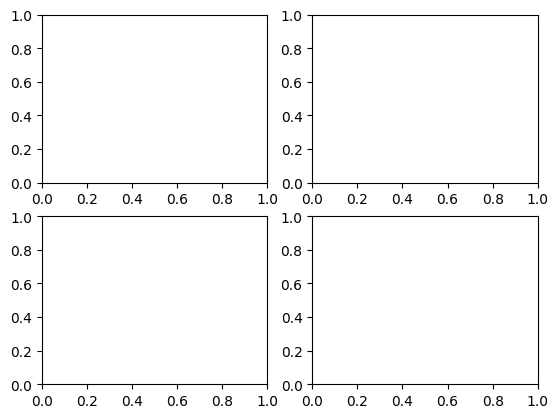

In [41]:
print(polylla_inradoius)
fig, axs = plt.subplots(2,2)
d = 0
# print(polylla_inradoius[0][0][1])
for x in range(2):
    for y in range(2):
        # convex_polys_ir = [polylla_inradoius[i][d][1] for i in range(n_experiments)]
        convex_polys_a = [polylla_area[i][d][1] for i in range(n_experiments)]
        convex_polys_e1 = [polylla_e1[i][d][1] for i in range(n_experiments)]
        # convex_polys_e2 = [polylla_e2[i][d][1] for i in range(n_experiments)]
        # convex_polys_tra = [polylla_tra[i][d][1] for i in range(n_experiments)]
        print(convex_polys_a)

        # axs[x,y].plot(n_list,convex_polys_ir, label = 'unión por inradio')
        axs[x,y].plot(n_list, convex_polys_a, label = 'unión por area')
        axs[x,y].plot(n_list, convex_polys_e1, label = 'unión por aspect 1')
        # axs[x,y].plot(n_list, convex_polys_e2, label = 'unión por aspect 2')
        # axs[x,y].plot(n_list, convex_polys_tra, label = 'unión por triangle aspect')
        
        axs[x,y].set(xlabel = 'puntos')
        axs[x,y].set_title('Porcentaje convexidad ' + distributions[d])
        # d+= 1
for ax in axs.flat:
    ax.label_outer()
plt.legend()
plt.show()

[([0.2500030994415283, 0.8592233009708737, [0.08741972780644938, 2.6375427105042896e-05, 0.500406121626004], [3.4479889042995837, 1, 22], [8.895977808599168, 4, 46], [0.9188557193569015, 2.469817929913602e-05, 1.0000046121230735, 96.46324549237171], [0.9952465210338167, 0.5357470665738339, 1.236732721334576]], (1442, 453, 298, 283), (994, 10433, 4984, 6442)), ([1.4878783226013184, 0.8866650876361913, [0.09807068201935758, 1.6328152323300608e-06, 0.5229658639470173], [3.420416864045476, 1, 21], [8.840833728090953, 4, 44], [0.9341385969683113, 1.411936963706147e-08, 1, 96.43533870203696], [0.9933672086621937, 0.5413360926411519, 1.3426986972465258]], (8444, 2681, 1819, 1516), (4998, 59196, 28920, 35273)), ([4.055963516235352, 0.8737829065993509, [0.09562927254412079, 3.260439847572092e-07, 0.6076395948365849], [3.4655006611371557, 1, 21], [8.931001322274312, 4, 44], [0.9273737948630969, 1.5831860748352122e-09, 1.0000260721596923, 96.20747686019955], [0.9934640205822943, 0.439966484580072

IndexError: tuple index out of range

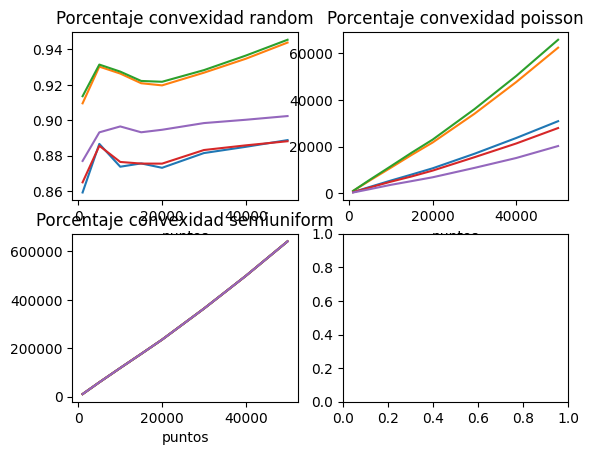

In [ ]:
print(polylla_inradoius)
fig, axs = plt.subplots(2,2)
d = 0
# print(polylla_inradoius[0][0][1])
experiments_names = ['Tiempo ejecución ','Porcentaje convexidad ']
n_metric = len(experiments_names)
for x in range(2):
    for y in range(2):
        convex_polys_ir = [polylla_inradoius[i][d][1] for i in range(n_experiments)]
        convex_polys_a = [polylla_area[i][d][1] for i in range(n_experiments)]
        convex_polys_e1 = [polylla_e1[i][d][1] for i in range(n_experiments)]
        convex_polys_e2 = [polylla_e2[i][d][1] for i in range(n_experiments)]
        convex_polys_tra = [polylla_tra[i][d][1] for i in range(n_experiments)]
        print(convex_polys_a)

        axs[x,y].plot(n_list,convex_polys_ir, label = 'unión por inradio')
        axs[x,y].plot(n_list, convex_polys_a, label = 'unión por area')
        axs[x,y].plot(n_list, convex_polys_e1, label = 'unión por aspect 1')
        axs[x,y].plot(n_list, convex_polys_e2, label = 'unión por aspect 2')
        axs[x,y].plot(n_list, convex_polys_tra, label = 'unión por triangle aspect')
        
        axs[x,y].set(xlabel = 'puntos')
        axs[x,y].set_title('Porcentaje convexidad ' + distributions[d])
        d+= 1
for ax in axs.flat:
    ax.label_outer()
plt.legend()
plt.show()